<a href="https://colab.research.google.com/github/Anne340/KNN_and_Naive_Bayes_Classifier/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question



## Specifiying the question
Finding out if the passanger survived the titanic or not

## Defining the metric for success

We are trying to create a model that will help us see if a passanger survived or not. A model with a 75% accuracy and above

## Understanding the context

The columns we are working with are as follows


1.   Survival - states if the person survived or not
2.   pclass - lists the ticket class
3.   Sex - tells us the sex of the passanger
4.   Age - tells us the age of the passanger
5.   sibsp - tells us the number of siblings / spouses aboard the Titanic
6.   parch - tells us the number of parents / children aboard the Titanic
7.   ticket- tells us the ticket number of the passanger
8.   fare - tells us the fare the passanger paid
9.   cabin- tells us the cabin number of the passanger
10.  embarked - tells us where the passanger embarked




## Recording the experimental design

Import the necessary libraries

Load the dataset

Read the dataset

Clean the dataset

Perform univariate and bivariate analysis

Perfrom knn classifier

## Data Relevance

The dataset is relevant in answering our question. 

It contains 891 rows and 12 columns

# Importing Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets

In [4]:
# Load the datasets we are to work with
train = pd.read_csv('train (5).csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('test (1).csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

# Reading the dataset

In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Checking shape of data
train.shape

(891, 12)

In [8]:
# Checking information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Checking the statistical distribution of the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Checking for unique values in each column
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Cleaning the dataset

In [11]:
# Checking for null values in the dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Checking the percentage of missing values
train.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
# Dropping those less than 50%
train.dropna(subset=['Age'], how='all', inplace=True)
train.dropna(subset=['Embarked'], how='all', inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [15]:
train.shape

(712, 12)

In [16]:
# Dropping unecessary columns
train.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], inplace=True, axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We dropped the cabin column since 77% of its data is missing

In [17]:
# Checking for duplicates
train.duplicated().sum()

38

There are no duplicates in the dataset

# Univariate analysis

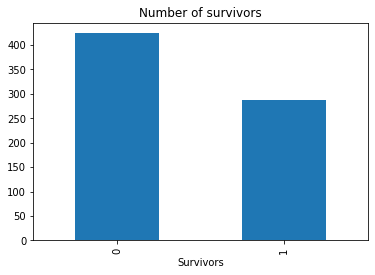

In [18]:
# Comparing those who survived
train.Survived.value_counts().plot.bar(title = "Number of survivors")
plt.xlabel('Survivors')
plt.show()

Most people did not survive the titanic

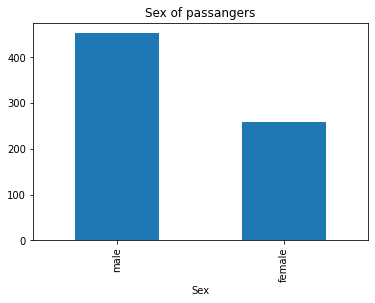

In [19]:
# Histogram showing gender of passangers
train.Sex.value_counts().plot.bar(title = "Sex of passangers")
plt.xlabel("Sex")
plt.show()

Most of the passangers were male

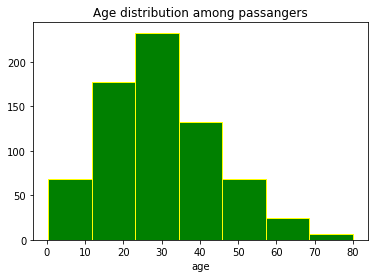

In [20]:
# histogram showing distribution of passanger ages
plt.hist(train['Age'], bins=7, edgecolor="yellow", color="green")
plt.title("Age distribution among passangers")
plt.xlabel("age")
plt.show()

Most passangers were aged 25-35

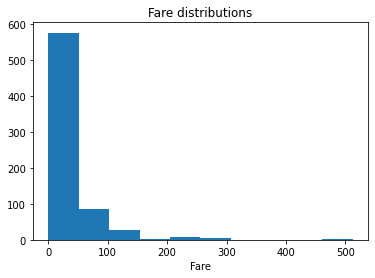

In [21]:
plt.hist(train['Fare'], bins=10)
plt.title('Fare distributions')
plt.xlabel('Fare')
plt.show()

Most people paid a fare of 0-50

# Bivariate Analysis

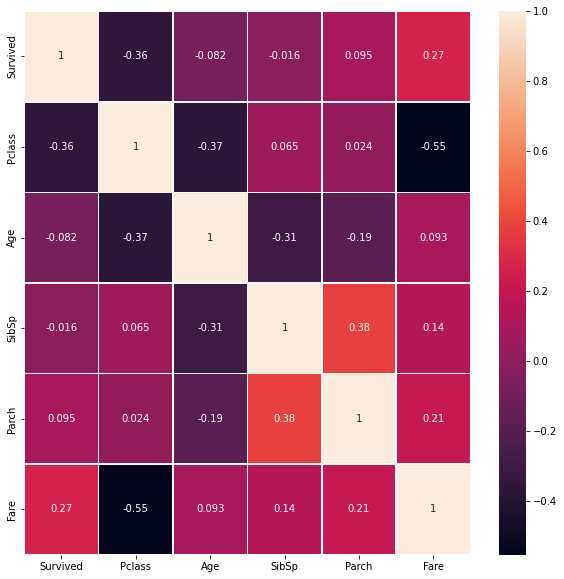

In [22]:
correlation = train.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax)

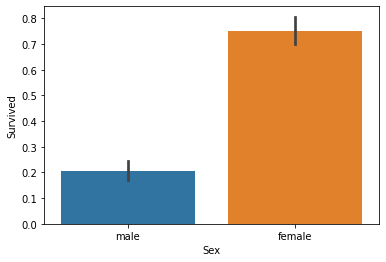

In [23]:
sns.barplot(y= 'Survived', x='Sex', data=train)

Most females survived compared to males

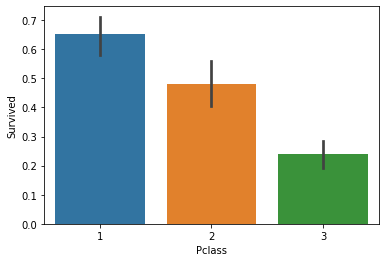

In [24]:
sns.barplot(x='Pclass', y='Survived', data=train)

Most of the passangers who survived belonged to first class

In [25]:
# Displaying a pairplot
# sns.pairplot(train)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
# Encoding our categorical values
dummies = pd.get_dummies(train[['Sex', 'Embarked']], drop_first=True)
train = pd.concat([train.drop(['Sex', 'Embarked'],axis=1), dummies],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# K Nearest Neighbours Classifier

## 80:20 partition

In [28]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[72 10]
 [22 39]]


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7762237762237763


## 70:30 partition

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Normalize our data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Finding the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[72 10]
 [22 39]]
0.7762237762237763


## 60:40 Parition

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Normalize our data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Finding the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[141  28]
 [ 32  84]]
0.7894736842105263


# Optimization of the model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

# Normalize our data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Reducing the dimensions in our dataset using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
        

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = 10,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Normalize our data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 7, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)

# Making prediction the created model
y_pred = model2.predict(X_test)

# Evaluate the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Finding the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[73  9]
 [19 42]]
0.8041958041958042


After optimization of the model there is an increace in performance to 80%